In [1]:
# Load all the necessary imports for the programme
from sklearn.datasets import load_iris # We are gonna use the iris dataset for this demonstration.
from sklearn.metrics import classification_report,confusion_matrix # Evaluation metrics for classification
from sklearn.model_selection import cross_val_score # Cross val score to predict using different combinations of the folds.
import pandas as pd # For dataframem manipulation
import seaborn as sns # For plotting graphs

In [2]:
X,y = load_iris(return_X_y=True) # load the dataset
# Basically we already have the variables and labels stored in different values , reducing wokload(preprocessing). 
# In iris dataset we are give iris flower properties (continous numeric) and we have to predict based on this properties
# which flower belong to which class

In [3]:
# Import all the models that can be used to classify the species.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# The model selection for ensemble learning - Voting is upto us . 
# We can either use multiple different models or a same models with different paramaters tuned with it .
lor1 = LogisticRegression(max_iter = 1000)
clf1 = DecisionTreeClassifier(
    criterion = 'gini'
)
clf2 = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5 ,
    splitter = 'random'
)
gnb1 = GaussianNB()

In [5]:
# We make a estimator list consiting of all the tuples which has the name of that model so that VotingClassifier 
# can uniquely identify it and this is followe by the object of that model instantiated earlier . 
'''
            syntax : estimators(just a variable name) = 
            [
                ('modelname1' , model1),
                ('modelname2' , mode2), . . . 
                ('modelnameN' , modelN),
]
'''
estimators = [
    ('LogisticRegressor1' , lor1) , 
    ('DecisionTreeClassifier' , clf1) , 
    ('DecisionTreeClassifierUsingRandom' , clf2) ,
    ('GaussianNaiveBayes' , gnb1)
]

In [6]:
# Import the Voting Ensemble Classifier from the ensemble module
from sklearn.ensemble import VotingClassifier

In [7]:
voteHard = VotingClassifier(
    estimators = estimators ,  # Pass the variables in which we made the list of the modelnames and models (estimators)
    voting = 'hard' # We are using hard voting which means only the predicted label is passed as the output for the ensembler and 
    # not the probability of all the other classes which were not predicted . 
)

In [8]:
voteHard.fit(X,y) # Fit the X and y values 
# To be honest this should be X_train and Y_train but for simplicity we are gonna pass X and y

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('LogisticRegressor1', ...), ('DecisionTreeClassifier', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'hard'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [9]:
pred1 = voteHard.predict(X) # Predict species based on X features

In [10]:
cross_val_score(voteHard,X,y,cv=10,scoring='accuracy') # Calculate the cross val score to evaluate performance

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [11]:
cross_val_score(voteHard,X,y,cv=10,scoring='accuracy').mean() # Calculate the mean of  cross val score to evaluate performance

np.float64(0.9533333333333334)

In [12]:
print(classification_report(y,pred1)) # Examine the different classfication metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.98      0.96        50
           2       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [13]:
conf1 = pd.DataFrame(confusion_matrix(y,pred1)) # Convert to dataframe for better visualizing the data

In [14]:
conf1

,0,1,2
0,50,0,0
1,0,49,1
2,0,3,47


<Axes: >

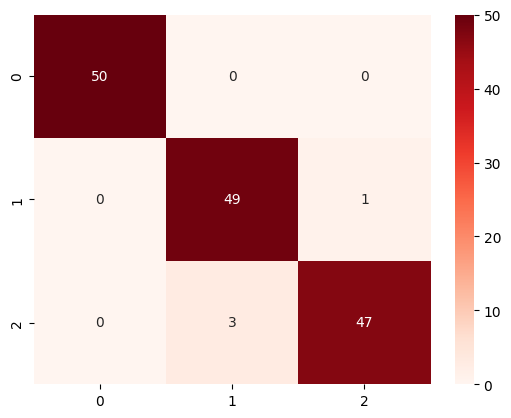

In [15]:
# Visualize the confusion matrix using heatmap
sns.heatmap(
    data = conf1,
    cmap = 'Reds',
    annot = True # For values to be displayed
)

In [16]:
# Now lets do the same process but with soft Voting Ensemble
voteSoft = VotingClassifier(
    estimators = estimators ,  # Pass the variables in which we made the list of the modelnames and models (estimators)
    voting = 'soft'  
)

In [17]:
voteSoft.fit(X,y) 

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('LogisticRegressor1', ...), ('DecisionTreeClassifier', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [18]:
pred2 = voteSoft.predict(X)

In [19]:
# Now compare the Hard and Soft evaluation metrics 

In [20]:
cross_val_score(voteSoft,X,y,cv=10,scoring='accuracy')

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 0.93333333, 1.        , 1.        ])

In [21]:
cross_val_score(voteSoft,X,y,cv=10,scoring='accuracy').mean()

np.float64(0.9533333333333334)

In [22]:
print(classification_report(y,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [23]:
conf2 = pd.DataFrame(confusion_matrix(y,pred2))

In [24]:
conf2 

,0,1,2
0,50,0,0
1,0,48,2
2,0,2,48


<Axes: >

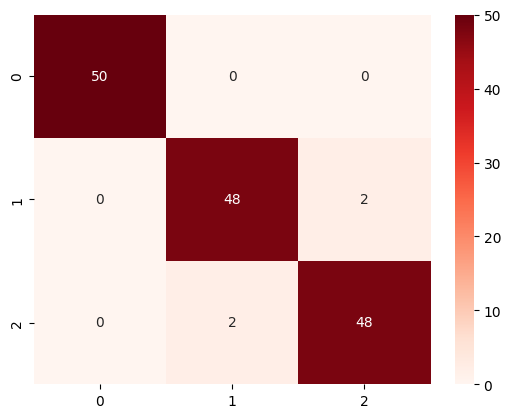

In [25]:

sns.heatmap(
    data = conf2,
    cmap = 'Reds',
    annot = True 
)

In [ ]:
# The results are almost the same fo this so we will try some changes .